# Notebookの検索

## NBSearchの準備

### Solr, S3互換ストレージの用意

NBSearchはSolrおよびS3互換ストレージをバックエンドとして利用します。本デモ環境ではSolrとS3互換ストレージとしてMinIOを利用していますので、実際にNBSearchを動作して試すことができます。

In [3]:
print('Solrプロセス:')
!ps aux | grep solr | grep -v grep
print()
print('MinIOプロセス:')
!ps aux | grep minio | grep -v grep

Solrプロセス:
jovyan        17  3.8  0.2 5015412 587532 ?      Sl   09:22   0:25 java -server -Xms512m -Xmx512m -XX:+UseG1GC -XX:+PerfDisableSharedMem -XX:+ParallelRefProcEnabled -XX:MaxGCPauseMillis=250 -XX:+UseLargePages -XX:+AlwaysPreTouch -XX:+ExplicitGCInvokesConcurrent -Xlog:gc*:file=/var/solr/logs/solr_gc.log:time,uptime:filecount=9,filesize=20M -Dsolr.jetty.inetaccess.includes= -Dsolr.jetty.inetaccess.excludes= -Dsolr.log.dir=/var/solr/logs -Djetty.port=8983 -DSTOP.PORT=7983 -DSTOP.KEY=solrrocks -Duser.timezone=UTC -XX:-OmitStackTraceInFastThrow -XX:OnOutOfMemoryError=/opt/solr/bin/oom_solr.sh 8983 /var/solr/logs -Djetty.home=/opt/solr/server -Dsolr.solr.home=/var/solr/data -Dsolr.data.home= -Dsolr.install.dir=/opt/solr -Dsolr.default.confdir=/opt/solr/server/solr/configsets/_default/conf -Dlog4j.configurationFile=/var/solr/log4j2.xml -Dlog4j2.formatMsgNoLookups=true -Xss256k -jar start.jar --module=http --module=gzip

MinIOプロセス:
jovyan        16  0.2  0.0 871676 101836 ?       Sl 

独自にDockerコンテナを起動する場合のサービス設定方法は以下を参考にしてください。

https://github.com/NII-cloud-operation/Jupyter-LC_docker/blob/master/sample-notebooks/03_Notebook%E3%81%AE%E6%A4%9C%E7%B4%A2.ipynb

### NBSearch拡張の有効化

NBSearch拡張は本デモ環境ではデフォルトで有効化されています。

拡張が無効化された環境では、NBextensionsタブで、 `NBSearch - Tree` と `NBSearch - Notebook` 拡張のチェックボックスを押して有効化してください。

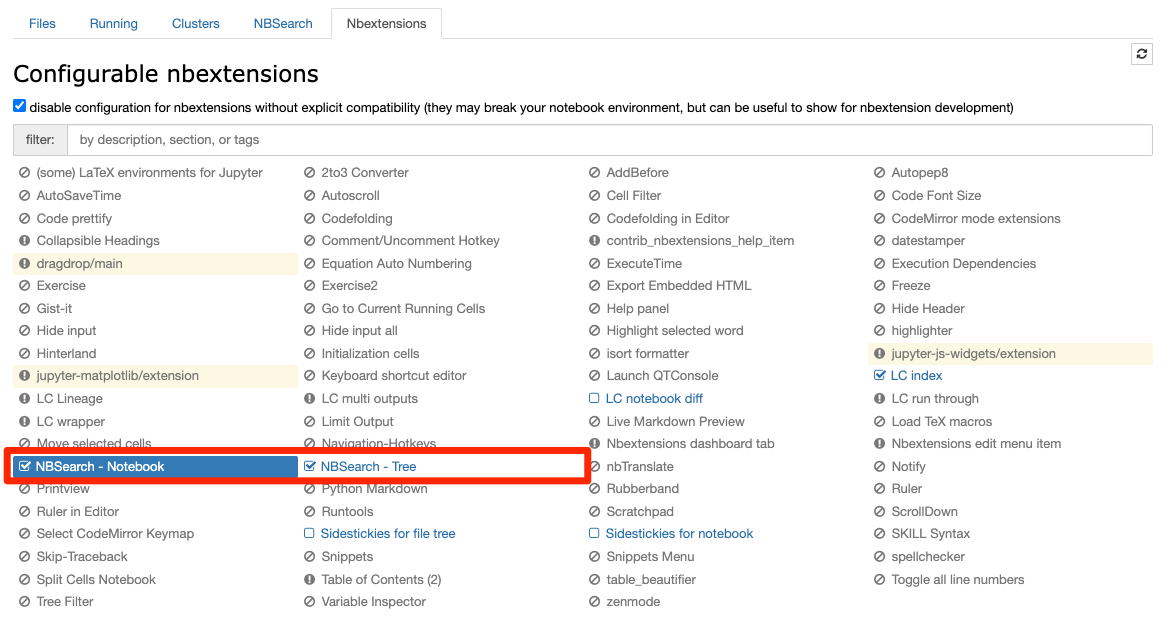

また、検索結果から `Notebookの比較` をおこないたい場合は、 `LC notebook diff` 拡張のチェックをして有効化してください。

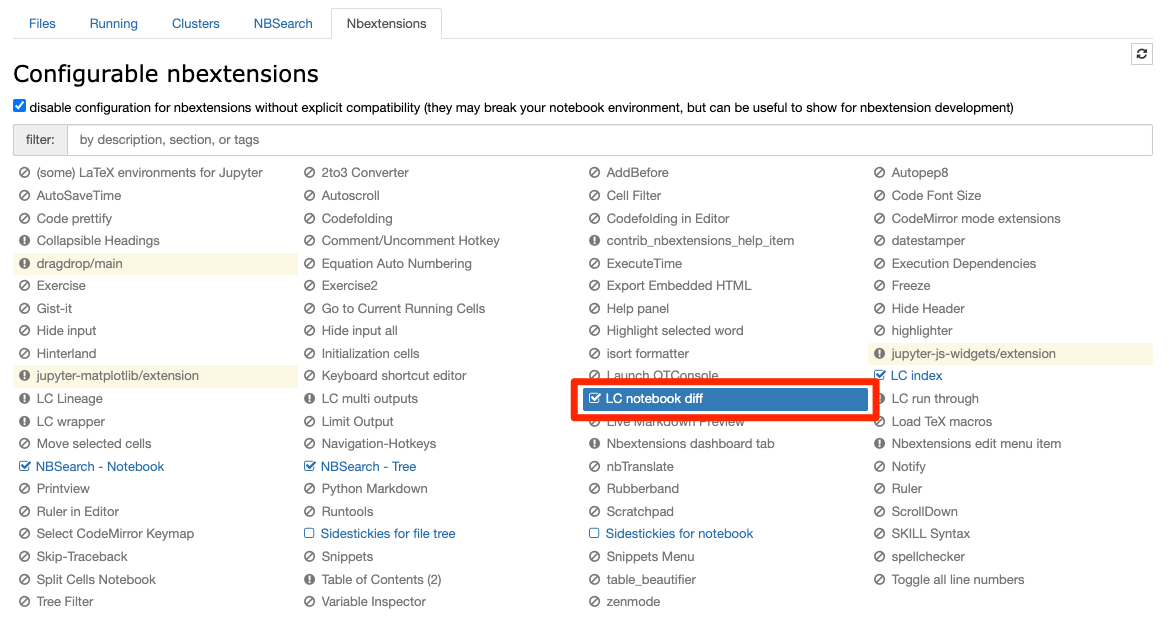

## NBSearchの使い方 - Notebookの検索

*NBSearch - Tree拡張を有効化*後、ブラウザを再読み込みするとNBSearchタブが現れます。ここから、Notebookを検索することができます。

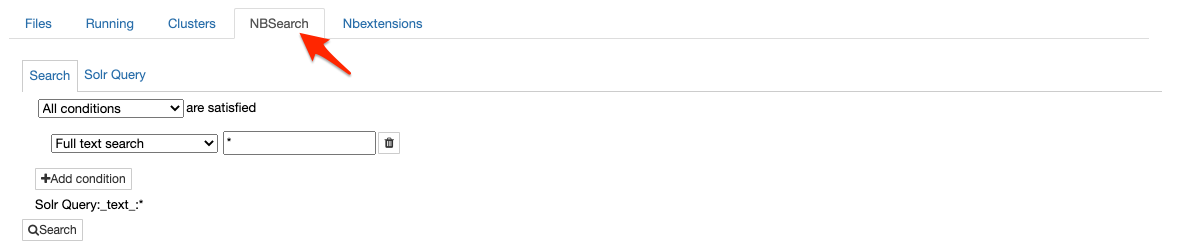

### キーワードによる検索

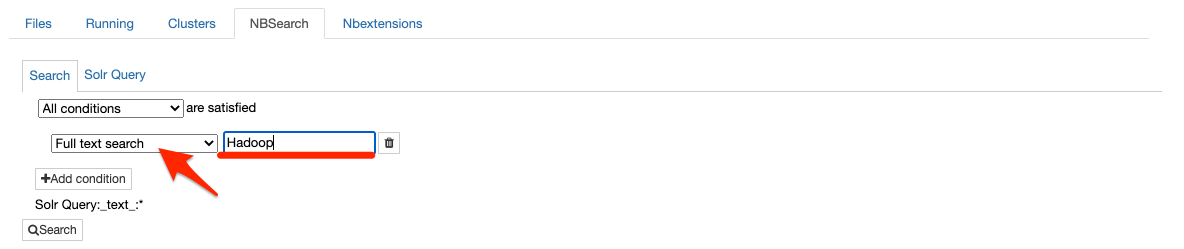

Full text search を選択し、キーワードを入力すると、Solrに保存されたNotebookに対して文字列により検索することができます。
文字列はCode Cell, Markdown Cell, Output, Pathを対象に検索されます。


### Notebookの情報に基づく検索

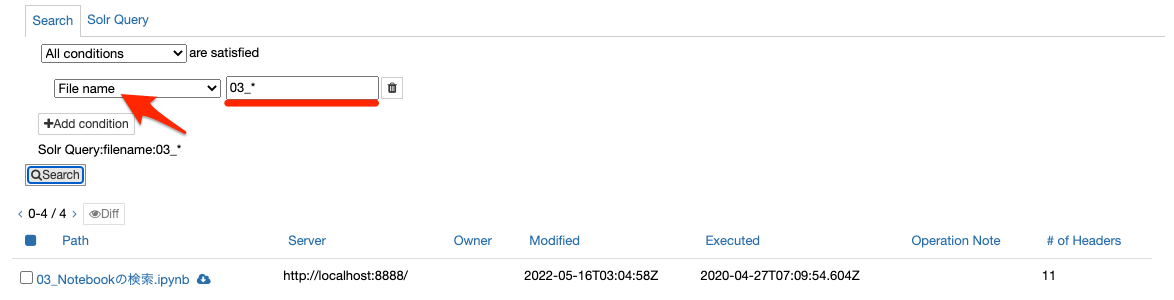

NotebookのファイルパスやサーバのURL, 更新時刻に対して検索することができます。
検索条件をドロップダウンから選択し、その後、テキストフィールドに検索条件を入力して、 検索 を実施してください。

ワイルドカードの記述方法は [Luceneクエリ構文](https://lucene.apache.org/core/2_9_4/queryparsersyntax.html) に従います。公式ドキュメント等を参考にしてください。

### Cellの情報に基づく検索

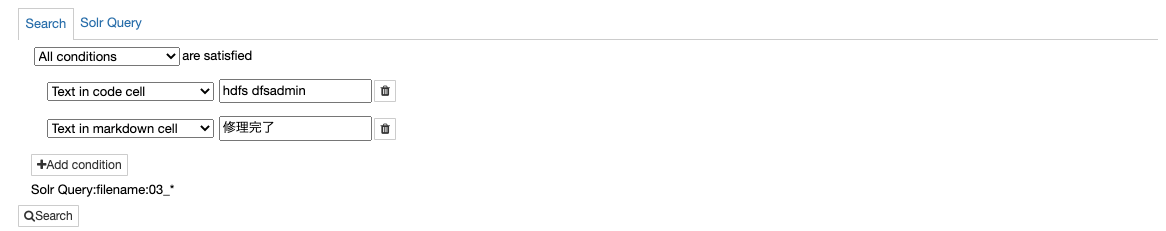

NotebookがどのようなCellを含んでいるかどうかを指定して検索することができます。
Cellに関する条件は複数設定することができます。+ボタンで複数のセル条件を追加することができます。


### 検索結果の確認

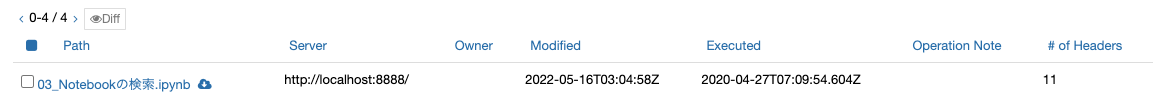

* ページの切り替え ... 検索結果が50を超える場合、 < > でページを切り替えることができます
* Diff ... 比較したいNotebookを検索結果からチェックボックスにより選択することで、 Notebook比較 を行うことができます。

#### Notebookのダウンロード

検索結果のパス名をクリックすると、Notebookを開くことができます。nbsearch-tmpというフォルダがNotebookフォルダ配下に作成され、そこに一時的にダウンロードされます。
ダウンロードボタン(雲↓)をクリックすると、現在のJupyterツリーで開いているフォルダ(Filesタブで確認できます)にNotebookをダウンロードし、開くことができます。

## NBSearchの使い方 - Cellの検索

*NBSearch - Notebook拡張を有効化*後、Notebookを開くと検索ボタンが現れます。ここから、選択しているCellに応じた検索をすることができます。

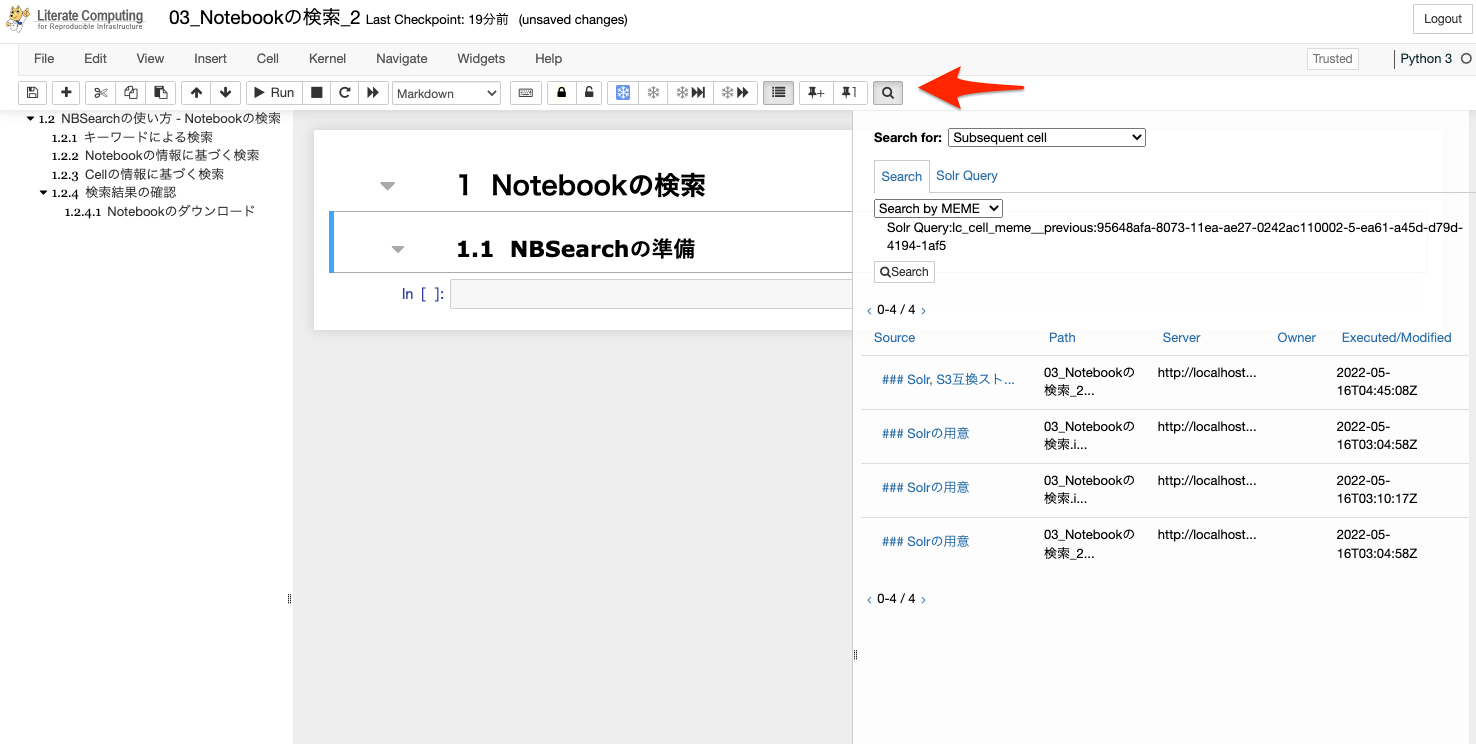

### 先行・後続するCellの検索

Search forドロップダウンからPreceding cell/Subsequent cellを選択することで、現在選択しているCellの前後に現れうるCellを検索することができます。

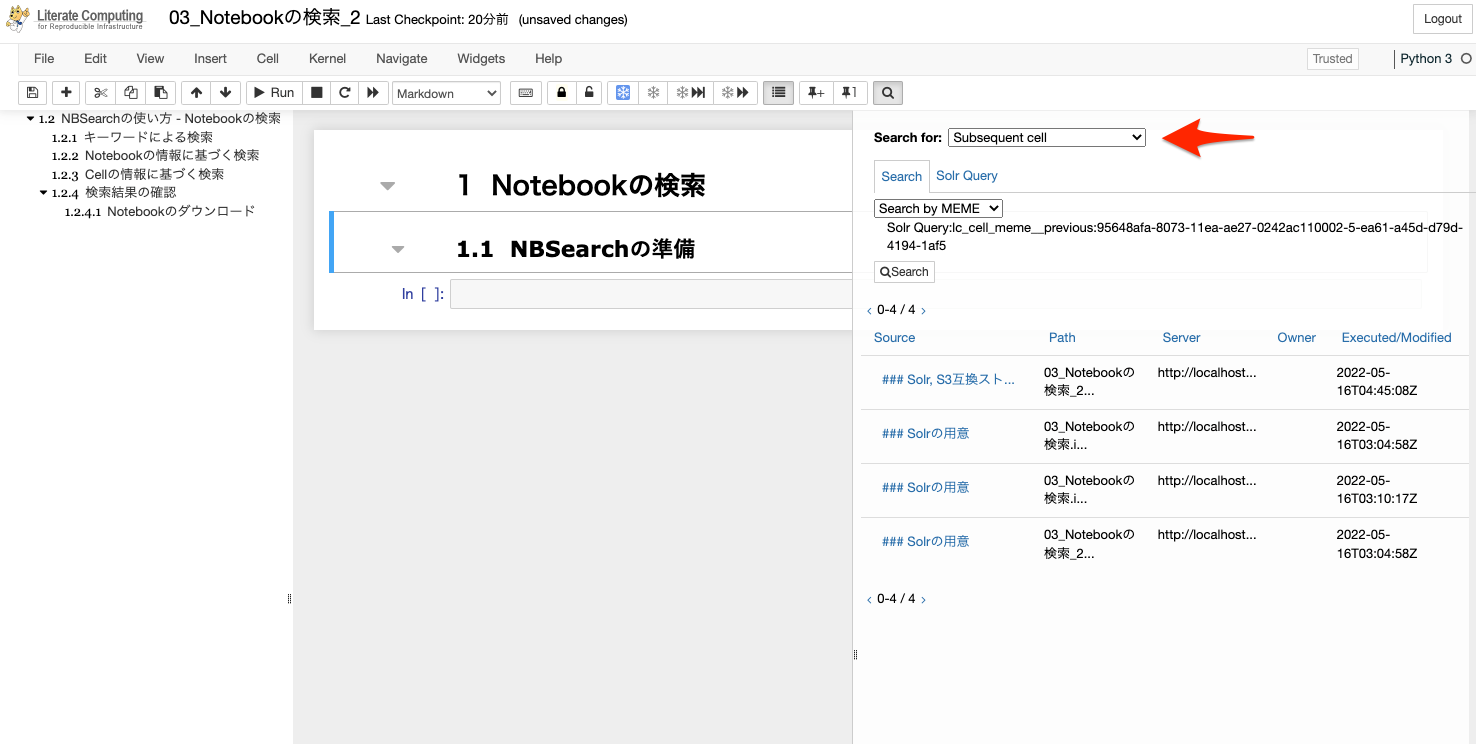

前後の検索はCellに記録されたMEMEと呼ぶ識別子に基づいて行われます。MEMEはランダムに生成される識別子で、NotebookやCellがコピーされる際に保持されます。これにより、前後に現れうるCellの検索を実現しています。

### 検索結果の反映

検索結果をクリックすると、Notebook上に + ボタンと共にセルの内容が表示されます。+ボタンを押すと、そのセルを追加することができます。

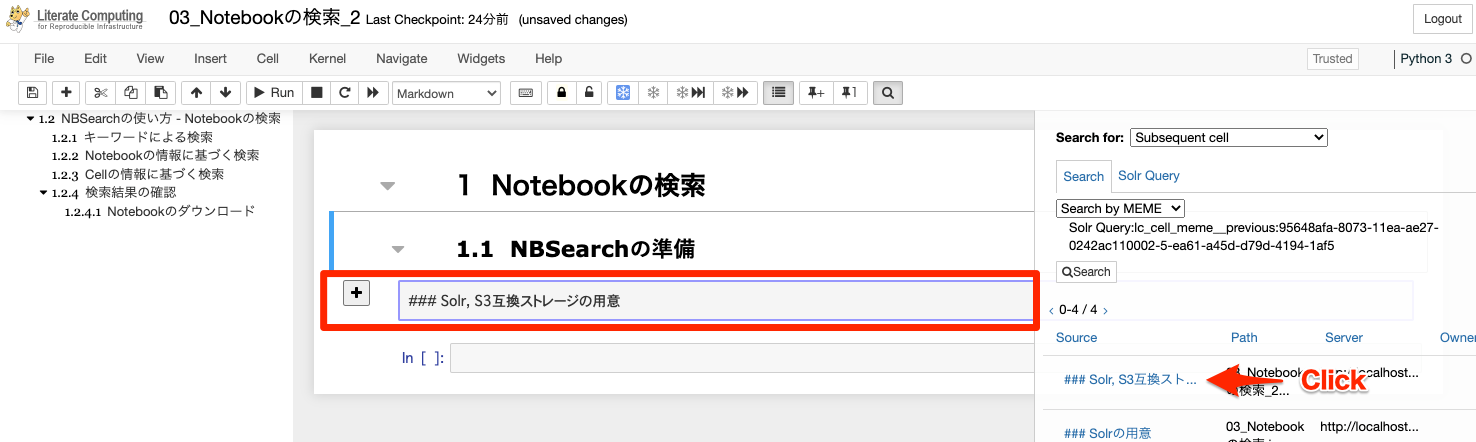